In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np


class DLA:
    def __init__(self,L=300):
        self.L = L
        self.walker_count = 0
        self.middle = L//2

        self.world = np.zeros((L,L))

        self.world[L//2,L//2]=1
        self.radi = 3
        self.ringSize = L//10
        self.maxRadi = self.ringSize  + self.radi

    def init_walker(self):
        if self.radi <self.L//2:
            # print(self.L//2-self.radi)
            self.walker_count += 1



            while True:
                angle = random.random()*2*np.pi

                start_x = self.L//2 + int(self.radi*np.cos(angle))
                start_y = self.L//2 + int(self.radi*np.sin(angle))
                if self.move_walker(start_x,start_y):
                    return True
        else:
            return False

# NN sum from https://stackoverflow.com/questions/36964875/sum-of-8-neighbors-in-2d-array/37026344

    def move_walker(self,x,y):
        while True:
            r = 1+ int(np.sqrt((x-self.L//2)**2+(y-self.L//2)**2))

            if r > self.maxRadi:
                return False


            if r < self.middle and (self.world[x-1][y]+self.world[x+1][y]+self.world[x][y+1]+self.world[x][y-1])>0:

                self.world[x][y]=1
                if r >= self.radi:
                    self.radi =r+ 2
                self.maxRadi= self.radi + self.ringSize
                return True
            else:
                move_val = random.randrange(0,4)
                if move_val ==0:
                    x+= 1
                elif move_val ==1:
                    x-= 1
                elif move_val ==2:
                    y+= 1
                else :
                    y-= 1





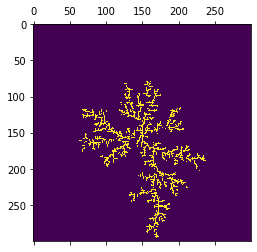

In [3]:
app = DLA()
while  app.init_walker():
    pass

fig = plt.figure()
ax = plt.axes()
plot = ax.matshow(app.world)
plt.show()